In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle

import flopy
from flopy.utils import Raster

sys.path.insert(1, '../../modules')
# hand made functions
from Rouss1 import *
from Rouss2 import *
from Rouss3D import *
from ZoneBudget_ludo import *

sys.path.insert(1,"../../Model_val/upscalling/")
from upscalling_functions import*

flopy is installed in C:\Users\schorppl\AppData\Local\Continuum\anaconda3\lib\site-packages\flopy


In [2]:
#list all the files
lst_file = []
idx_zon=[]
folder = "../../data/recharge/chroniques_recharge"

for file in os.listdir(folder):
    if file.endswith(".csv"):
        path_file = os.path.join(folder,file)
        lst_file.append(path_file)
        idx_zon.append(int(os.path.splitext(file)[0][1:]))

In [3]:
# Create a dictionnary for recharge and time as data and zones as keys
dic_rch={}
for idx,file in enumerate(lst_file):
    idx = int(idx)
    zon_data = pd.read_csv(file,sep=";")
    zon_data["Date"] = pd.to_datetime(zon_data["Date"])
    zon_lst = []
    for i in range(zon_data.shape[0]):
        zon_lst.append((zon_data.iloc[i,0],zon_data.iloc[i,1]))
    dic_rch[idx_zon[idx]] = zon_lst

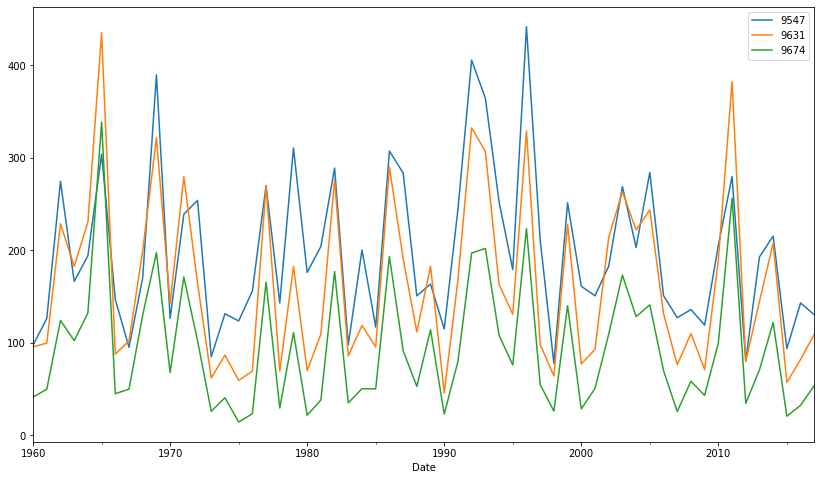

In [4]:
fig,ax = plt.subplots(figsize=(14,8))
for iz in idx_zon:
    a = pd.DataFrame(dic_rch[iz],columns=["Date","{}".format(iz)])
    a.set_index("Date").resample("y").sum().plot(ax=ax)
